In [108]:
import pandas as pd

In [109]:
df=pd.read_csv(r'C:\Users\FWD\Documents\Sonstiges_Hobby\Formel 1\Sustainability survey\Strategy_raw data.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Result_Number        2307 non-null   int64  
 1   Q2                   2208 non-null   float64
 2   Q3                   2204 non-null   float64
 3   Q4                   2198 non-null   float64
 4   Q5                   1079 non-null   object 
 5   Q6                   2131 non-null   float64
 6   Q7                   2125 non-null   float64
 7   Q8_a                 2088 non-null   float64
 8   Q8_b                 2088 non-null   float64
 9   Q8_c                 2088 non-null   float64
 10  Q8_d                 2088 non-null   float64
 11  Q8_e                 2088 non-null   float64
 12  Q8_f                 2088 non-null   float64
 13  Q8_g                 2088 non-null   float64
 14  Q9_a                 2071 non-null   float64
 15  Q9_b                 2071 non-null   f

In [110]:
#get rid of survey results from participants who didn't completed the survey
not_completed=df[df['Finish_Date']=='0']
print(len(not_completed))


272


In [111]:
print(len(df))

2307


In [112]:
df_1=df.drop(df[(df.Finish_Date == '0')].index)
print(len(df_1))

2035


In [113]:
df_1

,Result_Number,Q2,Q3,Q4,Q5,Q6,Q7,Q8_a,Q8_b,Q8_c,...,Age,Driver_survey_field,F1_CRM_Opt_In,F1_CRM _Opt_In_Date,Favourite_F1_Driver,Favourite_F1_Team,Gender,GP_attendence,Segment,Where_are_you
1,2,4.0,2.0,2.0,NaN,3.0,2.0,3.0,4.0,1.0,...,35-44,2.0,Yes,21.05.2018,Lando Norris,Mercedes,Female,Yes,Purists,United Kingdom
2,3,2.0,1.0,2.0,NaN,2.0,2.0,1.0,1.0,4.0,...,18-24,2.0,NaN,08.01.2020,Lewis Hamilton,McLaren,Male,"No, but I have plans to attend one this year",Purists,Romania
3,4,1.0,1.0,1.0,"separating waste, using less plastics - especi...",2.0,2.0,1.0,1.0,4.0,...,35-44,4.0,Yes,14.12.2018,Lewis Hamilton,Mercedes,Male,No,Purists,Slovakia
4,5,3.0,1.0,1.0,recycling,2.0,2.0,2.0,1.0,4.0,...,25-34,5.0,Yes,14.12.2018,Kimi Raikkonen,McLaren,Male,Yes,Purists,United Kingdom
5,6,2.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,3.0,...,35-44,4.0,No,11.05.2018,Sebastian Vettel,Ferrari,Male,Yes,Excitables,Hungary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,2302,3.0,1.0,2.0,NaN,1.0,2.0,1.0,1.0,3.0,...,35-44,NaN,Yes,NaN,Lewis Hamilton,McLaren,Male,NaN,NaN,Brazil
2302,2303,1.0,1.0,2.0,NaN,3.0,3.0,2.0,2.0,3.0,...,65+,5.0,Yes,04.05.2018,Kimi Raikkonen,Ferrari,Male,Yes,Purists,United Kingdom
2304,2305,2.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,3.0,...,25-34,NaN,NaN,NaN,Max Verstappen,Red Bull,Male,NaN,NaN,Croatia
2305,2306,1.0,1.0,2.0,NaN,2.0,2.0,1.0,1.0,3.0,...,18-24,NaN,Yes,NaN,Lando Norris,McLaren,Male,NaN,NaN,Germany


In [114]:
print(df_1.shape)

(2035, 54)


In [115]:
#create dummy variables
cat_vars=['Q2','Q3','Q4','Q6','Q7','Q8_a','Q8_b','Q8_c','Q8_d','Q8_e','Q8_f','Q8_g','Q9_a','Q9_b','Q9_c','Q9_d','Q9_e','Q9_f','Q12_a','Q12_b','Q12_c','Q12_d','Q12_e','Q12_f','Q13_a','Q13_b','Q13_c','Q13_d','Q13_e','Q13_f','Age','Gender ']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(df_1[var], prefix=var)
    df_2=df_1.join(cat_list)
    df_1=df_2
cat_vars=['Q2','Q3','Q4','Q6','Q7','Q8_a','Q8_b','Q8_c','Q8_d','Q8_e','Q8_f','Q8_g','Q9_a','Q9_b','Q9_c','Q9_d','Q9_e','Q9_f','Q12_a','Q12_b','Q12_c','Q12_d','Q12_e','Q12_f','Q13_a','Q13_b','Q13_c','Q13_d','Q13_e','Q13_f','Age','Gender ']
df_vars=df_1.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]
print(to_keep)

['Result_Number', 'Q5', 'Q10_a', 'dep_var', 'Q11', 'Q14', 'User_ID', 'User', 'Start_Date', 'Start_Time', 'Finish_Date', 'Finish_Time', 'Average_Time', 'Interface', 'Driver_survey_field', 'F1_CRM_Opt_In', 'F1_CRM _Opt_In_Date', 'Favourite_F1_Driver', 'Favourite_F1_Team', 'GP_attendence', 'Segment', 'Where_are_you', 'Q2_1.0', 'Q2_2.0', 'Q2_3.0', 'Q2_4.0', 'Q3_1.0', 'Q3_2.0', 'Q4_1.0', 'Q4_2.0', 'Q6_1.0', 'Q6_2.0', 'Q6_3.0', 'Q6_4.0', 'Q6_5.0', 'Q7_1.0', 'Q7_2.0', 'Q7_3.0', 'Q8_a_1.0', 'Q8_a_2.0', 'Q8_a_3.0', 'Q8_a_4.0', 'Q8_a_5.0', 'Q8_b_1.0', 'Q8_b_2.0', 'Q8_b_3.0', 'Q8_b_4.0', 'Q8_b_5.0', 'Q8_c_1.0', 'Q8_c_2.0', 'Q8_c_3.0', 'Q8_c_4.0', 'Q8_c_5.0', 'Q8_d_1.0', 'Q8_d_2.0', 'Q8_d_3.0', 'Q8_d_4.0', 'Q8_d_5.0', 'Q8_e_1.0', 'Q8_e_2.0', 'Q8_e_3.0', 'Q8_e_4.0', 'Q8_e_5.0', 'Q8_f_1.0', 'Q8_f_2.0', 'Q8_f_3.0', 'Q8_f_4.0', 'Q8_f_5.0', 'Q8_g_1.0', 'Q8_g_2.0', 'Q8_g_3.0', 'Q8_g_4.0', 'Q8_g_5.0', 'Q9_a_1.0', 'Q9_a_2.0', 'Q9_a_3.0', 'Q9_a_4.0', 'Q9_a_5.0', 'Q9_b_1.0', 'Q9_b_2.0', 'Q9_b_3.0', 'Q9_b_4.

In [116]:
#create dataset to work with
df_3=df_1[to_keep]
df_3.columns.values

array(['Result_Number', 'Q5', 'Q10_a', 'dep_var', 'Q11', 'Q14', 'User_ID',
       'User', 'Start_Date', 'Start_Time', 'Finish_Date', 'Finish_Time',
       'Average_Time', 'Interface', 'Driver_survey_field',
       'F1_CRM_Opt_In', 'F1_CRM _Opt_In_Date', 'Favourite_F1_Driver',
       'Favourite_F1_Team', 'GP_attendence', 'Segment', 'Where_are_you',
       'Q2_1.0', 'Q2_2.0', 'Q2_3.0', 'Q2_4.0', 'Q3_1.0', 'Q3_2.0',
       'Q4_1.0', 'Q4_2.0', 'Q6_1.0', 'Q6_2.0', 'Q6_3.0', 'Q6_4.0',
       'Q6_5.0', 'Q7_1.0', 'Q7_2.0', 'Q7_3.0', 'Q8_a_1.0', 'Q8_a_2.0',
       'Q8_a_3.0', 'Q8_a_4.0', 'Q8_a_5.0', 'Q8_b_1.0', 'Q8_b_2.0',
       'Q8_b_3.0', 'Q8_b_4.0', 'Q8_b_5.0', 'Q8_c_1.0', 'Q8_c_2.0',
       'Q8_c_3.0', 'Q8_c_4.0', 'Q8_c_5.0', 'Q8_d_1.0', 'Q8_d_2.0',
       'Q8_d_3.0', 'Q8_d_4.0', 'Q8_d_5.0', 'Q8_e_1.0', 'Q8_e_2.0',
       'Q8_e_3.0', 'Q8_e_4.0', 'Q8_e_5.0', 'Q8_f_1.0', 'Q8_f_2.0',
       'Q8_f_3.0', 'Q8_f_4.0', 'Q8_f_5.0', 'Q8_g_1.0', 'Q8_g_2.0',
       'Q8_g_3.0', 'Q8_g_4.0', 'Q8_g_5.0', 

In [117]:
#delete unnecessary columns
del df_3['Result_Number']
df_3.columns.values

array(['Q5', 'Q10_a', 'dep_var', 'Q11', 'Q14', 'User_ID', 'User',
       'Start_Date', 'Start_Time', 'Finish_Date', 'Finish_Time',
       'Average_Time', 'Interface', 'Driver_survey_field',
       'F1_CRM_Opt_In', 'F1_CRM _Opt_In_Date', 'Favourite_F1_Driver',
       'Favourite_F1_Team', 'GP_attendence', 'Segment', 'Where_are_you',
       'Q2_1.0', 'Q2_2.0', 'Q2_3.0', 'Q2_4.0', 'Q3_1.0', 'Q3_2.0',
       'Q4_1.0', 'Q4_2.0', 'Q6_1.0', 'Q6_2.0', 'Q6_3.0', 'Q6_4.0',
       'Q6_5.0', 'Q7_1.0', 'Q7_2.0', 'Q7_3.0', 'Q8_a_1.0', 'Q8_a_2.0',
       'Q8_a_3.0', 'Q8_a_4.0', 'Q8_a_5.0', 'Q8_b_1.0', 'Q8_b_2.0',
       'Q8_b_3.0', 'Q8_b_4.0', 'Q8_b_5.0', 'Q8_c_1.0', 'Q8_c_2.0',
       'Q8_c_3.0', 'Q8_c_4.0', 'Q8_c_5.0', 'Q8_d_1.0', 'Q8_d_2.0',
       'Q8_d_3.0', 'Q8_d_4.0', 'Q8_d_5.0', 'Q8_e_1.0', 'Q8_e_2.0',
       'Q8_e_3.0', 'Q8_e_4.0', 'Q8_e_5.0', 'Q8_f_1.0', 'Q8_f_2.0',
       'Q8_f_3.0', 'Q8_f_4.0', 'Q8_f_5.0', 'Q8_g_1.0', 'Q8_g_2.0',
       'Q8_g_3.0', 'Q8_g_4.0', 'Q8_g_5.0', 'Q9_a_1.0', 'Q9_a

In [118]:
del df_3['Q5']
del df_3['Q10_a']
del df_3['Q11']
del df_3['Q14']
del df_3['User_ID']
del df_3['User']
del df_3['Start_Date']
del df_3['Start_Time']
del df_3['Finish_Date']
del df_3['Finish_Time']
del df_3['Average_Time']
del df_3['Interface']
del df_3['Driver_survey_field']
del df_3['F1_CRM_Opt_In']
del df_3['F1_CRM _Opt_In_Date']
del df_3['Favourite_F1_Driver']
del df_3['Favourite_F1_Team']
del df_3['GP_attendence']
del df_3['Segment']
del df_3['Where_are_you']

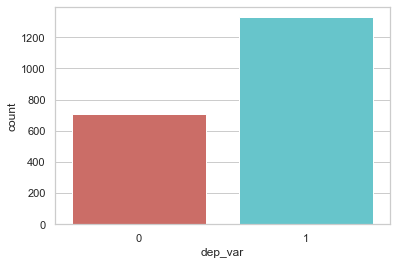

In [119]:
#check dependent variable
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='dep_var',data=df_1,palette='hls')
plt.show()

In [120]:
df_1['dep_var'].value_counts()

1    1328
0     707
Name: dep_var, dtype: int64

In [121]:
count_F1_better_perception=len(df_1[df_1['dep_var']==1])
count_F1_unchanged_worse_perception=len(df_1[df_1['dep_var']==0])
pct_of_better_perception=count_F1_better_perception/(count_F1_better_perception+count_F1_unchanged_worse_perception)
print(f'The share of fans who perceive F1 in a better way is {round(pct_of_better_perception*100,2)}%.')

The share of fans who perceive F1 in a better way is 65.26%.


In [122]:
#introduce intercept for the model
df_3['intercept']=1

C:\Users\FWD\AppData\Local\Temp/ipykernel_18888/2841346865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['intercept']=1


In [123]:
df_3.columns.values

array(['dep_var', 'Q2_1.0', 'Q2_2.0', 'Q2_3.0', 'Q2_4.0', 'Q3_1.0',
       'Q3_2.0', 'Q4_1.0', 'Q4_2.0', 'Q6_1.0', 'Q6_2.0', 'Q6_3.0',
       'Q6_4.0', 'Q6_5.0', 'Q7_1.0', 'Q7_2.0', 'Q7_3.0', 'Q8_a_1.0',
       'Q8_a_2.0', 'Q8_a_3.0', 'Q8_a_4.0', 'Q8_a_5.0', 'Q8_b_1.0',
       'Q8_b_2.0', 'Q8_b_3.0', 'Q8_b_4.0', 'Q8_b_5.0', 'Q8_c_1.0',
       'Q8_c_2.0', 'Q8_c_3.0', 'Q8_c_4.0', 'Q8_c_5.0', 'Q8_d_1.0',
       'Q8_d_2.0', 'Q8_d_3.0', 'Q8_d_4.0', 'Q8_d_5.0', 'Q8_e_1.0',
       'Q8_e_2.0', 'Q8_e_3.0', 'Q8_e_4.0', 'Q8_e_5.0', 'Q8_f_1.0',
       'Q8_f_2.0', 'Q8_f_3.0', 'Q8_f_4.0', 'Q8_f_5.0', 'Q8_g_1.0',
       'Q8_g_2.0', 'Q8_g_3.0', 'Q8_g_4.0', 'Q8_g_5.0', 'Q9_a_1.0',
       'Q9_a_2.0', 'Q9_a_3.0', 'Q9_a_4.0', 'Q9_a_5.0', 'Q9_b_1.0',
       'Q9_b_2.0', 'Q9_b_3.0', 'Q9_b_4.0', 'Q9_b_5.0', 'Q9_c_1.0',
       'Q9_c_2.0', 'Q9_c_3.0', 'Q9_c_4.0', 'Q9_c_5.0', 'Q9_d_1.0',
       'Q9_d_2.0', 'Q9_d_3.0', 'Q9_d_4.0', 'Q9_d_5.0', 'Q9_e_1.0',
       'Q9_e_2.0', 'Q9_e_3.0', 'Q9_e_4.0', 'Q9_e_5.0', 'Q9_

In [124]:
#construct a logistic regression model using statsmodels
import statsmodels.api as sm
cols_to_keep = ['dep_var', 'intercept', 'Q2_1.0', 'Q2_2.0', 'Q2_3.0', 'Q3_1.0',
       'Q4_1.0', 'Q6_1.0', 'Q6_2.0',
       'Q6_4.0', 'Q6_5.0', 'Q7_1.0', 'Q7_3.0', 'Q8_a_1.0',
       'Q8_a_2.0', 'Q8_a_4.0', 'Q8_a_5.0', 'Q8_b_1.0',
       'Q8_b_2.0', 'Q8_b_4.0', 'Q8_b_5.0', 'Q8_c_1.0',
       'Q8_c_2.0', 'Q8_c_4.0', 'Q8_c_5.0', 'Q8_d_1.0',
       'Q8_d_2.0', 'Q8_d_4.0', 'Q8_d_5.0', 'Q8_e_1.0',
       'Q8_e_2.0', 'Q8_e_4.0', 'Q8_e_5.0', 'Q8_f_1.0',
       'Q8_f_2.0', 'Q8_f_4.0', 'Q8_f_5.0', 'Q8_g_1.0',
       'Q8_g_2.0', 'Q8_g_4.0', 'Q8_g_5.0', 'Q9_a_1.0',
       'Q9_a_2.0', 'Q9_a_4.0', 'Q9_a_5.0', 'Q9_b_1.0',
       'Q9_b_2.0', 'Q9_b_4.0', 'Q9_b_5.0', 'Q9_c_1.0',
       'Q9_c_2.0', 'Q9_c_4.0', 'Q9_c_5.0', 'Q9_d_1.0',
       'Q9_d_2.0', 'Q9_d_4.0', 'Q9_d_5.0', 'Q9_e_1.0',
       'Q9_e_2.0', 'Q9_e_4.0', 'Q9_e_5.0', 'Q9_f_1.0',
       'Q9_f_2.0', 'Q9_f_4.0', 'Q9_f_5.0', 'Q12_a_1.0',
       'Q12_a_2.0', 'Q12_a_4.0', 'Q12_a_5.0', 'Q12_b_1.0',
       'Q12_b_2.0', 'Q12_b_4.0', 'Q12_b_5.0', 'Q12_c_1.0',
       'Q12_c_2.0', 'Q12_c_4.0', 'Q12_c_5.0', 'Q12_d_1.0',
       'Q12_d_2.0', 'Q12_d_4.0', 'Q12_d_5.0', 'Q12_e_1.0',
       'Q12_e_2.0', 'Q12_e_4.0', 'Q12_e_5.0', 'Q12_f_1.0',
       'Q12_f_2.0', 'Q12_f_4.0', 'Q12_f_5.0', 'Q13_a_1.0',
       'Q13_a_2.0', 'Q13_a_4.0', 'Q13_a_5.0', 'Q13_b_1.0',
       'Q13_b_2.0', 'Q13_b_4.0', 'Q13_b_5.0', 'Q13_c_1.0',
       'Q13_c_2.0', 'Q13_c_4.0', 'Q13_c_5.0', 'Q13_d_1.0',
       'Q13_d_2.0', 'Q13_d_4.0', 'Q13_d_5.0', 'Q13_e_1.0',
       'Q13_e_2.0', 'Q13_e_4.0', 'Q13_e_5.0', 'Q13_f_1.0',
       'Q13_f_2.0', 'Q13_f_4.0', 'Q13_f_5.0', 'Age_16 or 17',
       'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64',
       'Age_Prefer not to say', 'Age_Under 16',
       'Gender _Female', 'Gender _Prefer not to say']

#define dependent and independent variables
data = df_3[cols_to_keep]
train_cols = data.columns[1:]
logit = sm.Logit(data['dep_var'], data[train_cols])

#calculate the result
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.318517
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                dep_var   No. Observations:                 2035
Model:                          Logit   Df Residuals:                     1913
Method:                           MLE   Df Model:                          121
Date:                Wed, 05 Jan 2022   Pseudo R-squ.:                  0.5068
Time:                        16:04:11   Log-Likelihood:                -648.18
converged:                       True   LL-Null:                       -1314.3
Covariance Type:            nonrobust   LLR p-value:                5.373e-203
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                    -3.7396      0.575     -6.502      0.000      -4.

In [125]:
#calculate odds ratios
print(np.exp(result.params))

intercept                     0.023763
Q2_1.0                        2.915323
Q2_2.0                        1.876423
Q2_3.0                        1.326828
Q3_1.0                        1.779105
                               ...    
Age_55-64                     1.328694
Age_Prefer not to say         7.919327
Age_Under 16                 40.969134
Gender _Female                0.690842
Gender _Prefer not to say     0.497390
Length: 122, dtype: float64


In [126]:
#check accuracy in addition to R-squared
from math import e
print(e)

2.718281828459045


In [127]:
df_3['exp_value_model_1']=1/(1+e**(-1*(-3.7396+df_3['Q2_1.0']*1.07+df_3['Q2_2.0']*0.6294+df_3['Q2_3.0']*0.2828+df_3['Q3_1.0']*0.5761+df_3['Q4_1.0']*0.117+df_3['Q6_1.0']*1.3275+df_3['Q6_2.0']*0.9851-df_3['Q6_4.0']*0.5118+df_3['Q6_5.0']*1.4526-df_3['Q7_1.0']*0.4592+df_3['Q7_3.0']*0.0206+df_3['Q8_a_1.0']*1.2638+df_3['Q8_a_2.0']*0.7473-df_3['Q8_a_4.0']*0.0066-df_3['Q8_a_5.0']*1.7061+df_3['Q8_b_1.0']*0.0812+df_3['Q8_b_2.0']*0.1498+df_3['Q8_b_4.0']*0.0327-df_3['Q8_b_5.0']*0.1128-df_3['Q8_c_1.0']*1.1587-df_3['Q8_c_2.0']*0.2984+df_3['Q8_c_4.0']*0.4116+df_3['Q8_c_5.0']*0.4815-df_3['Q8_d_1.0']*0.5420-df_3['Q8_d_2.0']*0.3103-df_3['Q8_d_4.0']*0.0771-df_3['Q8_d_5.0']*0.6077+df_3['Q8_e_1.0']*0.8584+df_3['Q8_e_2.0']*0.1062+df_3['Q8_e_4.0']*0.2932+df_3['Q8_e_5.0']*0.3496+df_3['Q8_f_1.0']*0.3318-df_3['Q8_f_2.0']*0.4691-df_3['Q8_f_4.0']*0.1742-df_3['Q8_f_5.0']*0.2556+df_3['Q8_g_1.0']*0.1887-df_3['Q8_g_2.0']*0.0028+df_3['Q8_g_4.0']*1.2561-df_3['Q8_g_5.0']*0.6968+df_3['Q9_a_1.0']*0.2672+df_3['Q9_a_2.0']*0.1595+df_3['Q9_a_4.0']*0.1553+df_3['Q9_a_5.0']*0.4844+df_3['Q9_b_1.0']*0.02740+df_3['Q9_b_2.0']*0.2129-df_3['Q9_b_4.0']*1.0287+df_3['Q9_b_5.0']*0.3290+df_3['Q9_c_1.0']*0.8270+df_3['Q9_c_2.0']*0.2399+df_3['Q9_c_4.0']*0.1552+df_3['Q9_c_5.0']*0.1281-df_3['Q9_d_1.0']*0.1199-df_3['Q9_d_2.0']*0.3061+df_3['Q9_d_4.0']*0.1664+df_3['Q9_d_5.0']*0.0899-df_3['Q9_e_1.0']*0.8392+df_3['Q9_e_2.0']*0.0639+df_3['Q9_e_4.0']*0.3895+df_3['Q9_e_5.0']*0.4879+df_3['Q9_f_1.0']*0.8582+df_3['Q9_f_2.0']*0.5807-df_3['Q9_f_4.0']*0.7926-df_3['Q9_f_5.0']*0.3204+df_3['Q12_a_1.0']*0.7440+df_3['Q12_a_2.0']*0.4035+df_3['Q12_a_4.0']*0.0907+df_3['Q12_a_5.0']*0.7497-df_3['Q12_b_1.0']*0.4944-df_3['Q12_b_2.0']*0.3593-df_3['Q12_b_4.0']*0.1398+df_3['Q12_b_5.0']*1.9925+df_3['Q12_c_1.0']*0.0919+df_3['Q12_c_2.0']*0.2001+df_3['Q12_c_4.0']*0.5094-df_3['Q12_c_5.0']*1.1954-df_3['Q12_d_1.0']*0.24-df_3['Q12_d_2.0']*0.2574-df_3['Q12_d_4.0']*0.0088-df_3['Q12_d_5.0']*0.1272+df_3['Q12_e_1.0']*0.5608+df_3['Q12_e_2.0']*0.6764+df_3['Q12_e_4.0']*0.0418-df_3['Q12_e_5.0']*0.0276-df_3['Q12_f_1.0']*0.1099-df_3['Q12_f_2.0']*0.0845-df_3['Q12_f_4.0']*0.0008+df_3['Q12_f_5.0']*0.2655+df_3['Q13_a_1.0']*0.3044+df_3['Q13_a_2.0']*0.4851+df_3['Q13_a_4.0']*1.0542+df_3['Q13_a_5.0']*0.9214-df_3['Q13_b_1.0']*0.479-df_3['Q13_b_2.0']*0.1942-df_3['Q13_b_4.0']*0.9297-df_3['Q13_b_5.0']*0.4012-df_3['Q13_c_1.0']*0.1559+df_3['Q13_c_2.0']*0.0516-df_3['Q13_c_4.0']*0.0783-df_3['Q13_c_5.0']*0.2612-df_3['Q13_d_1.0']*0.4218-df_3['Q13_d_2.0']*0.3139-df_3['Q13_d_4.0']*0.1477+df_3['Q13_d_5.0']*0.0587-df_3['Q13_e_1.0']*0.0095+df_3['Q13_e_2.0']*0.0764+df_3['Q13_e_4.0']*0.2265-df_3['Q13_e_5.0']*0.4590+df_3['Q13_f_1.0']*0.7135+df_3['Q13_f_2.0']*0.3564+df_3['Q13_f_4.0']*0.0103+df_3['Q13_f_5.0']*0.0592+df_3['Age_16 or 17']*1.6258+df_3['Age_18-24']*1.1758+df_3['Age_25-34']*0.8532+df_3['Age_35-44']*0.6875+df_3['Age_45-54']*0.6340+df_3['Age_55-64']*0.2842+df_3['Age_Prefer not to say']*2.0693+df_3['Age_Under 16']*3.7128-df_3['Gender _Female']*0.3698-df_3['Gender _Prefer not to say']*0.6984)))
df_3['pred_model_1']=round(df_3['exp_value_model_1'],0)
df_3['check_model_1']=df_3['dep_var']-df_3['pred_model_1']
df_3

C:\Users\FWD\AppData\Local\Temp/ipykernel_18888/3670504243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['exp_value_model_1']=1/(1+e**(-1*(-3.7396+df_3['Q2_1.0']*1.07+df_3['Q2_2.0']*0.6294+df_3['Q2_3.0']*0.2828+df_3['Q3_1.0']*0.5761+df_3['Q4_1.0']*0.117+df_3['Q6_1.0']*1.3275+df_3['Q6_2.0']*0.9851-df_3['Q6_4.0']*0.5118+df_3['Q6_5.0']*1.4526-df_3['Q7_1.0']*0.4592+df_3['Q7_3.0']*0.0206+df_3['Q8_a_1.0']*1.2638+df_3['Q8_a_2.0']*0.7473-df_3['Q8_a_4.0']*0.0066-df_3['Q8_a_5.0']*1.7061+df_3['Q8_b_1.0']*0.0812+df_3['Q8_b_2.0']*0.1498+df_3['Q8_b_4.0']*0.0327-df_3['Q8_b_5.0']*0.1128-df_3['Q8_c_1.0']*1.1587-df_3['Q8_c_2.0']*0.2984+df_3['Q8_c_4.0']*0.4116+df_3['Q8_c_5.0']*0.4815-df_3['Q8_d_1.0']*0.5420-df_3['Q8_d_2.0']*0.3103-df_3['Q8_d_4.0']*0.0771

,dep_var,Q2_1.0,Q2_2.0,Q2_3.0,Q2_4.0,Q3_1.0,Q3_2.0,Q4_1.0,Q4_2.0,Q6_1.0,...,Age_65+,Age_Prefer not to say,Age_Under 16,Gender _Female,Gender _Male,Gender _Prefer not to say,intercept,exp_value_model_1,pred_model_1,check_model_1
1,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0.096861,0.0,0.0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0.839013,1.0,-1.0
3,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0.972559,1.0,0.0
4,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0.801342,1.0,-1.0
5,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0.715348,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,1,0,0,1,0,1,0,0,1,1,...,0,0,0,0,1,0,1,0.977919,1.0,0.0
2302,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0.271960,0.0,0.0
2304,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0.627685,1.0,0.0
2305,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0.951635,1.0,0.0


In [128]:
q=len(df_3[df_3['check_model_1']==0])
w=len(df_3[df_3['check_model_1']==1])
p=len(df_3[df_3['check_model_1']==-1])
r=q+w+p
t=round(q/r*100,2)
z=round(w/r*100,2)
u=round(p/r*100,2)
print(f'Summary model 1:\nThe dependent variable gets predicted correctly in {t}% of all cases.\nIt gets incorrectly predicted to be 1 in {z}% of all cases.\nIt gets incorrectly predicted to be 0 in {u}% of all cases.')

Summary model 1:
The dependent variable gets predicted correctly in 84.86% of all cases.
It gets incorrectly predicted to be 1 in 5.06% of all cases.
It gets incorrectly predicted to be 0 in 10.07% of all cases.


In [129]:
#try to reduce number of variables
cols_to_keep_2 = ['dep_var', 'intercept', 'Q2_1.0', 'Q2_2.0', 'Q2_3.0', 'Q3_1.0',
       'Q6_1.0', 'Q6_2.0',
       'Q6_4.0', 'Q6_5.0', 'Q8_a_1.0',
       'Q8_a_2.0', 'Q8_a_4.0', 'Q8_a_5.0',
       'Q8_c_1.0',
       'Q8_c_2.0', 'Q8_c_4.0', 'Q8_c_5.0',
       'Q8_e_1.0',
       'Q8_e_2.0', 'Q8_e_4.0', 'Q8_e_5.0',
       'Q8_g_1.0',
       'Q8_g_2.0', 'Q8_g_4.0', 'Q8_g_5.0',
       'Q9_b_1.0',
       'Q9_b_2.0', 'Q9_b_4.0', 'Q9_b_5.0', 'Q9_c_1.0',
       'Q9_c_2.0', 'Q9_c_4.0', 'Q9_c_5.0', 'Q9_f_1.0',
       'Q9_f_2.0', 'Q9_f_4.0', 'Q9_f_5.0', 'Q12_a_1.0',
       'Q12_a_2.0', 'Q12_a_4.0', 'Q12_a_5.0', 'Q12_e_1.0',
       'Q12_e_2.0', 'Q12_e_4.0', 'Q12_e_5.0', 'Age_16 or 17',
       'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64',
       'Age_Prefer not to say', 'Age_Under 16']

data_2 = df_3[cols_to_keep_2]
train_cols_2 = data_2.columns[1:]
logit_2 = sm.Logit(data_2['dep_var'], data_2[train_cols_2])

result_2 = logit_2.fit()
print(result_2.summary())

Optimization terminated successfully.
         Current function value: 0.339532
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                dep_var   No. Observations:                 2035
Model:                          Logit   Df Residuals:                     1982
Method:                           MLE   Df Model:                           52
Date:                Wed, 05 Jan 2022   Pseudo R-squ.:                  0.4743
Time:                        16:04:12   Log-Likelihood:                -690.95
converged:                       True   LL-Null:                       -1314.3
Covariance Type:            nonrobust   LLR p-value:                9.725e-227
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                -3.7612      0.503     -7.473      0.000      -4.748      -2.

In [130]:
cols_to_keep_3 = ['dep_var', 'intercept', 'Q2_1.0', 'Q3_1.0',
       'Q6_1.0', 'Q6_2.0',
       'Q8_a_1.0',
       'Q8_a_2.0',
       'Q8_c_1.0',
       'Q8_e_1.0',
       'Q8_g_4.0',
       'Q9_b_4.0', 'Q9_c_1.0',
       'Q9_f_1.0',
       'Q9_f_2.0', 'Q9_f_4.0', 'Q12_a_1.0',
       'Q12_e_2.0', 'Age_16 or 17',
       'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54']

data_3 = df_3[cols_to_keep_3]
train_cols_3 = data_3.columns[1:]
logit_3 = sm.Logit(data_3['dep_var'], data_3[train_cols_3])

result_3 = logit_3.fit()
print(result_3.summary())

Optimization terminated successfully.
         Current function value: 0.358092
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                dep_var   No. Observations:                 2035
Model:                          Logit   Df Residuals:                     2013
Method:                           MLE   Df Model:                           21
Date:                Wed, 05 Jan 2022   Pseudo R-squ.:                  0.4455
Time:                        16:04:12   Log-Likelihood:                -728.72
converged:                       True   LL-Null:                       -1314.3
Covariance Type:            nonrobust   LLR p-value:                8.728e-235
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -3.0037      0.303     -9.910      0.000      -3.598      -2.410
Q2_1.0           0.6139

In [131]:
cols_to_keep_4 = ['dep_var', 'intercept', 'Q2_1.0', 'Q3_1.0',
       'Q6_1.0', 'Q6_2.0',
       'Q8_a_1.0',
       'Q8_a_2.0',
       'Q8_c_1.0',
       'Q8_g_4.0',
       'Q9_b_4.0', 'Q9_c_1.0',
       'Q9_f_1.0',
       'Q9_f_2.0', 'Q9_f_4.0',
       'Age_16 or 17',
       'Age_18-24']

data_4 = df_3[cols_to_keep_4]
train_cols_4 = data_4.columns[1:]
logit_4 = sm.Logit(data_4['dep_var'], data_4[train_cols_4])

result_4 = logit_4.fit()
print(result_4.summary())

Optimization terminated successfully.
         Current function value: 0.359257
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                dep_var   No. Observations:                 2035
Model:                          Logit   Df Residuals:                     2019
Method:                           MLE   Df Model:                           15
Date:                Wed, 05 Jan 2022   Pseudo R-squ.:                  0.4437
Time:                        16:04:12   Log-Likelihood:                -731.09
converged:                       True   LL-Null:                       -1314.3
Covariance Type:            nonrobust   LLR p-value:                2.729e-239
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -2.7567      0.266    -10.359      0.000      -3.278      -2.235
Q2_1.0           0.6667

In [132]:
#odds ratios
print(np.exp(result_4.params))

intercept       0.063500
Q2_1.0          1.947870
Q3_1.0          1.923114
Q6_1.0          5.047116
Q6_2.0          3.523559
Q8_a_1.0        5.828442
Q8_a_2.0        3.252067
Q8_c_1.0        0.252046
Q8_g_4.0        0.349894
Q9_b_4.0        0.246215
Q9_c_1.0        2.026836
Q9_f_1.0        3.335760
Q9_f_2.0        2.436149
Q9_f_4.0        0.455347
Age_16 or 17    2.368897
Age_18-24       1.631446
dtype: float64


In [133]:
from math import e
print(e)

2.718281828459045


In [134]:
df_3['exp_value_model_2']=1/(1+e**(-1*(-2.7567+df_3['Q2_1.0']*0.6667+df_3['Q3_1.0']*0.6539+df_3['Q6_1.0']*1.6188+df_3['Q6_2.0']*1.2595+df_3['Q8_a_1.0']*1.7627+df_3['Q8_a_2.0']*1.1793-df_3['Q8_c_1.0']*1.3781-df_3['Q8_g_4.0']*1.0501-df_3['Q9_b_4.0']*1.4015+df_3['Q9_c_1.0']*0.7065+df_3['Q9_f_1.0']*1.2047+df_3['Q9_f_2.0']*0.8904-df_3['Q9_f_4.0']*0.7867+df_3['Age_16 or 17']*0.8624+df_3['Age_18-24']*0.4895)))
df_3['pred_model_2']=round(df_3['exp_value_model_2'],0)
df_3['check_model_2']=df_3['dep_var']-df_3['pred_model_2']
df_3

C:\Users\FWD\AppData\Local\Temp/ipykernel_18888/2485461993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['exp_value_model_2']=1/(1+e**(-1*(-2.7567+df_3['Q2_1.0']*0.6667+df_3['Q3_1.0']*0.6539+df_3['Q6_1.0']*1.6188+df_3['Q6_2.0']*1.2595+df_3['Q8_a_1.0']*1.7627+df_3['Q8_a_2.0']*1.1793-df_3['Q8_c_1.0']*1.3781-df_3['Q8_g_4.0']*1.0501-df_3['Q9_b_4.0']*1.4015+df_3['Q9_c_1.0']*0.7065+df_3['Q9_f_1.0']*1.2047+df_3['Q9_f_2.0']*0.8904-df_3['Q9_f_4.0']*0.7867+df_3['Age_16 or 17']*0.8624+df_3['Age_18-24']*0.4895)))
C:\Users\FWD\AppData\Local\Temp/ipykernel_18888/2485461993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,dep_var,Q2_1.0,Q2_2.0,Q2_3.0,Q2_4.0,Q3_1.0,Q3_2.0,Q4_1.0,Q4_2.0,Q6_1.0,...,Gender _Female,Gender _Male,Gender _Prefer not to say,intercept,exp_value_model_1,pred_model_1,check_model_1,exp_value_model_2,pred_model_2,check_model_2
1,0,0,0,0,1,0,1,0,1,0,...,1,0,0,1,0.096861,0.0,0.0,0.005569,0.0,0.0
2,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0.839013,1.0,-1.0,0.803592,1.0,-1.0
3,1,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0.972559,1.0,0.0,0.922478,1.0,0.0
4,0,0,0,1,0,1,0,1,0,0,...,0,1,0,1,0.801342,1.0,-1.0,0.739332,1.0,-1.0
5,1,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0.715348,1.0,0.0,0.773188,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,1,0,0,1,0,1,0,0,1,1,...,0,1,0,1,0.977919,1.0,0.0,0.946627,1.0,0.0
2302,0,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0.271960,0.0,0.0,0.436151,0.0,0.0
2304,1,0,1,0,0,1,0,1,0,0,...,0,1,0,1,0.627685,1.0,0.0,0.714920,1.0,0.0
2305,1,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0.951635,1.0,0.0,0.951014,1.0,0.0


In [135]:
a=len(df_3[df_3['check_model_2']==0])
s=len(df_3[df_3['check_model_2']==1])
d=len(df_3[df_3['check_model_2']==-1])
f=a+s+d
g=round(a/f*100,2)
h=round(s/f*100,2)
j=round(d/f*100,2)
print(f'Summary model 2:\nThe dependent variable gets predicted correctly in {g}% of all cases.\nIt gets incorrectly predicted to be 1 in {h}% of all cases.\nIt gets incorrectly predicted to be 0 in {j}% of all cases.')



Summary model 2:
The dependent variable gets predicted correctly in 84.13% of all cases.
It gets incorrectly predicted to be 1 in 4.82% of all cases.
It gets incorrectly predicted to be 0 in 11.06% of all cases.


Text(0.5, 0, '1 = Very concerned, 2 = Somewhat concerned, 3 = Concerned, 4 = Not concerned')

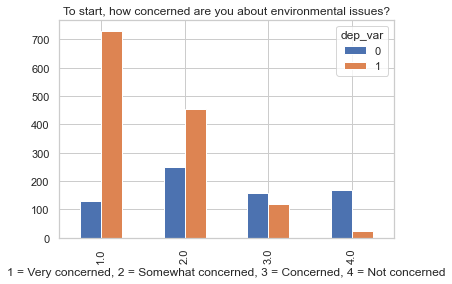

In [136]:
#plot relevant questions/statements in relation to dependent variable
pd.crosstab(df_1.Q2,df_1.dep_var).plot(kind='bar')
plt.title('To start, how concerned are you about environmental issues?')
plt.xlabel('1 = Very concerned, 2 = Somewhat concerned, 3 = Concerned, 4 = Not concerned')

Text(0.5, 0, '1 = Yes, 2 = No')

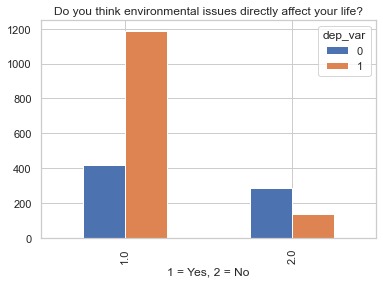

In [137]:
pd.crosstab(df_1.Q3,df_1.dep_var).plot(kind='bar')
plt.title('Do you think environmental issues directly affect your life?')
plt.xlabel('1 = Yes, 2 = No')

Text(0.5, 0, '1 = Very positive, 2 = Positive, 3 = Neither positive or negative, 4 = Negative, 5 = Very negative')

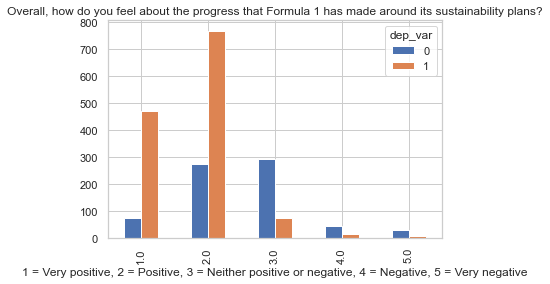

In [138]:
pd.crosstab(df_1.Q6,df_1.dep_var).plot(kind='bar')
plt.title('Overall, how do you feel about the progress that Formula 1 has made around its sustainability plans?')
plt.xlabel('1 = Very positive, 2 = Positive, 3 = Neither positive or negative, 4 = Negative, 5 = Very negative')

Text(0.5, 0, '1 = Strongly agree, 2 = Agree, 3 = Neither agree or disagree, 4 = Disagree, 5 = Strongly disagree')

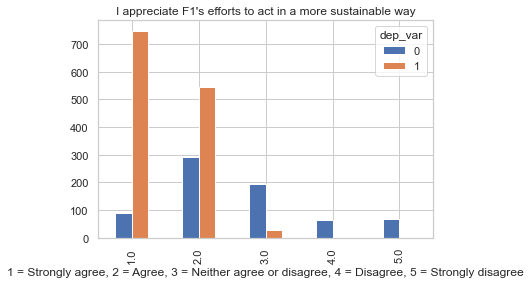

In [139]:
pd.crosstab(df_1.Q8_a,df_1.dep_var).plot(kind='bar')
plt.title("""I appreciate F1's efforts to act in a more sustainable way""")
plt.xlabel('1 = Strongly agree, 2 = Agree, 3 = Neither agree or disagree, 4 = Disagree, 5 = Strongly disagree')

Text(0.5, 0, '1 = Strongly agree, 2 = Agree, 3 = Neither agree or disagree, 4 = Disagree, 5 = Strongly disagree')

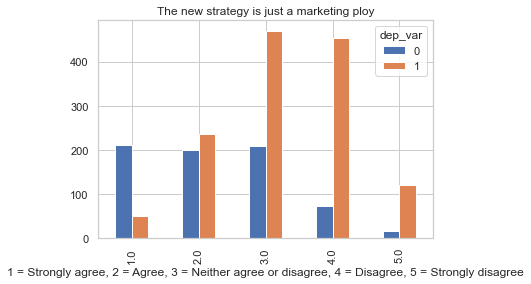

In [140]:
pd.crosstab(df_1.Q8_c,df_1.dep_var).plot(kind='bar')
plt.title('The new strategy is just a marketing ploy')
plt.xlabel('1 = Strongly agree, 2 = Agree, 3 = Neither agree or disagree, 4 = Disagree, 5 = Strongly disagree')

Text(0.5, 0, '1 = Strongly agree, 2 = Agree, 3 = Neither agree or disagree, 4 = Disagree, 5 = Strongly disagree')

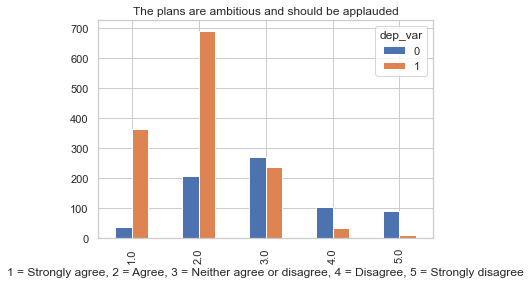

In [141]:
pd.crosstab(df_1.Q8_g,df_1.dep_var).plot(kind='bar')
plt.title('The plans are ambitious and should be applauded')
plt.xlabel('1 = Strongly agree, 2 = Agree, 3 = Neither agree or disagree, 4 = Disagree, 5 = Strongly disagree')

Text(0.5, 0, '1 = Strongly agree, 2 = Agree, 3 = Neither agree or disagree, 4 = Disagree, 5 = Strongly disagree')

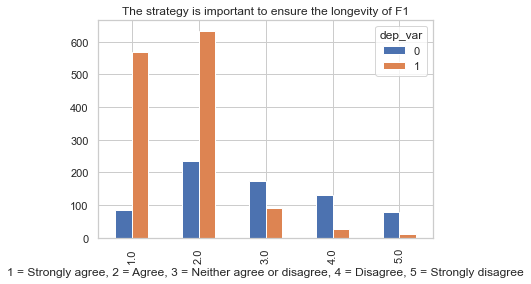

In [142]:
pd.crosstab(df_1.Q9_b,df_1.dep_var).plot(kind='bar')
plt.title("""The strategy is important to ensure the longevity of F1""")
plt.xlabel('1 = Strongly agree, 2 = Agree, 3 = Neither agree or disagree, 4 = Disagree, 5 = Strongly disagree')

Text(0.5, 0, '1 = Strongly agree, 2 = Agree, 3 = Neither agree or disagree, 4 = Disagree, 5 = Strongly disagree')

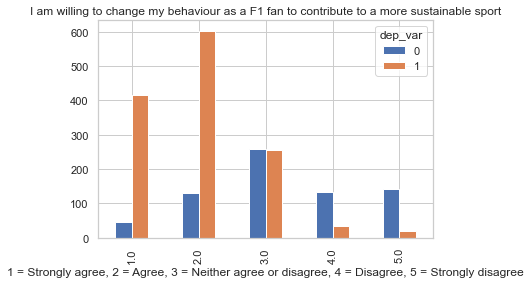

In [143]:
pd.crosstab(df_1.Q9_f,df_1.dep_var).plot(kind='bar')
plt.title('I am willing to change my behaviour as a F1 fan to contribute to a more sustainable sport')
plt.xlabel('1 = Strongly agree, 2 = Agree, 3 = Neither agree or disagree, 4 = Disagree, 5 = Strongly disagree')

<AxesSubplot:xlabel='Age'>

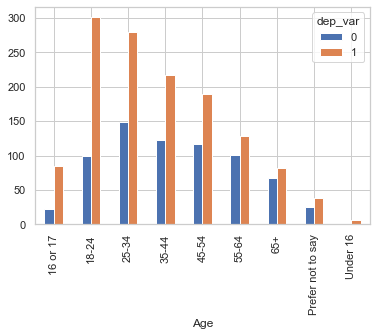

In [144]:
pd.crosstab(df_1.Age,df_1.dep_var).plot(kind='bar')